In [1]:
import os 
from pathlib import Path
import matplotlib.pyplot as plt 

In [2]:
%pwd

'c:\\Users\\Asus\\Machine_learning\\Deep_learning\\Projects_NN\\Speech_2_Text\\notebook'

In [3]:
os.chdir("../")

In [4]:
%pwd

'c:\\Users\\Asus\\Machine_learning\\Deep_learning\\Projects_NN\\Speech_2_Text'

In [5]:
audio_filepath = "Speaker26_004.wav"
test_audio = "artifacts\\audio\\recorded_audio.webm"

In [6]:
import tensorflow as tf 
import tensorflow_io as tfio 

In [7]:
def load_wav_16k_mono(filename):
    file_content    = tf.io.read_file(filename)
    wav,sample_rate = tf.audio.decode_wav(file_content,desired_channels=1)
    wav             = tf.squeeze(wav,axis=-1)
    sample_rate     = tf.cast(sample_rate,dtype=tf.int64)
    wav             = tfio.audio.resample(wav,rate_in=sample_rate,rate_out=16000)
    return wav

In [8]:
wav = load_wav_16k_mono(audio_filepath)

In [9]:
wav

<tf.Tensor: shape=(960005,), dtype=float32, numpy=
array([-1.4808217e-09,  3.6068404e-09, -6.6658878e-09, ...,
       -4.2934907e-03, -2.9830174e-03, -8.6175213e-03], dtype=float32)>

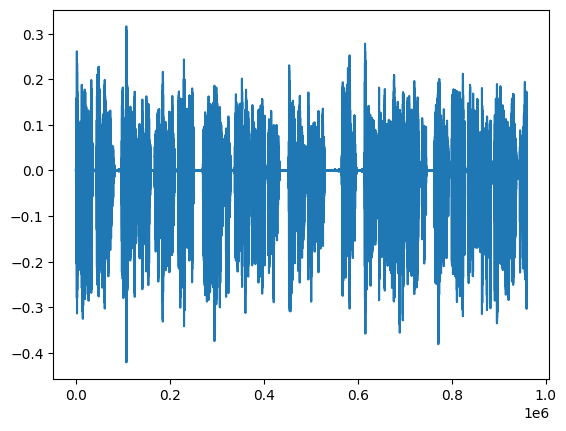

In [10]:
plt.plot(wav)
plt.show()

In [13]:
import torch
import whisper
import librosa
import numpy as np

In [41]:
model = whisper.load_model("base")
model = model.to(torch.float32)

In [42]:
def load_and_preprocess_audio(file_path, target_sample_rate=16000):
    audio_array, sample_rate = librosa.load(file_path, sr=None)  
    # Resample the audio to the target sample rate (e.g., 16 kHz)
    if sample_rate != target_sample_rate:
        audio_array = librosa.resample(audio_array,
                                       orig_sr   = sample_rate,
                                       target_sr = target_sample_rate)
    return audio_array, target_sample_rate


def noise_filtering(audio_array, sr=16000):
    # Apply a high-pass filter using librosa (removes low-frequency noise)
    audio_filtered = librosa.effects.preemphasis(audio_array)
    return audio_filtered

In [43]:

def transcribe_audio(file_path):
    audio_array, sample_rate    = load_and_preprocess_audio(file_path)
    audio_filtered              = noise_filtering(audio_array, sr=sample_rate)
    
    mel             = whisper.pad_or_trim(audio_filtered)
    result          = model.transcribe(mel)
    transcription   = result["text"]
    return transcription

In [44]:
text = transcribe_audio(audio_filepath)

c:\Users\Asus\anaconda3\envs\nlp_env\lib\site-packages\whisper\transcribe.py:78: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


In [45]:
text

' Later on in the day they sat down to eat, the food prepared being quite scalding. The man raised one of his dishes towards his mouth and blew in it. On the sater again inquiring the reason, he said that he did it to cool the meat. "\'I can no longer consider you as a friend,\' said the sater. A fellow who with the same breath blows hot and cold, I could never trust. A man who talks for both.'